In [1]:
import numpy as np 
# Datalar (Aylıq satışlar) 
aylar = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) 
satislar = np.array([1000, 1200, 1500, 1800, 2000, 2300, 2500, 2600, 2800, 3100, 3300, 3500])

In [2]:
# Sürətin dəyişmə analizi (Törəmə) 
suret = np.diff(satislar)  
# print 
print("Sürətlər:", suret)  
# Sürətin 2 ci dərəcədən törəmə ilə dəyişmə analizi 
suretlenme = np.diff(satislar, n=2)  
# print
print("Sürət dəyişməsi:", suretlenme)

Sürətlər: [200 300 300 200 300 200 100 200 300 200 200]
Sürət dəyişməsi: [ 100    0 -100  100 -100 -100  100  100 -100    0]


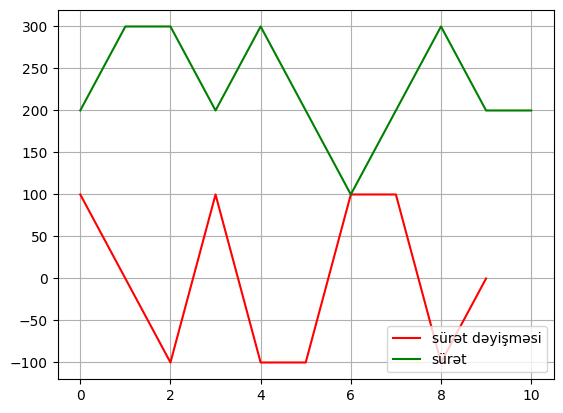

In [26]:
import matplotlib.pyplot as plt
fig = plt.gca()
plt.plot(suretlenme,color = "red",label = "sürət dəyişməsi")
plt.plot(suret,color = "green",label = "sürət")
plt.grid(True)
plt.legend(loc = "lower right")
plt.show()

In [4]:
from numpy.polynomial.polynomial import Polynomial  
# Polinom uyğunlaşdırma 
coefficient = Polynomial.fit(aylar, satislar, 3).convert().coef 
print("Polinom əmsalları:", coefficient)


Polinom əmsalları: [ 6.33333333e+02  3.40154290e+02 -1.58674659e+01  6.21600622e-01]


In [5]:
from scipy.integrate import simps  
# Sahə hesablanması (Simpson) 
sahe = simps(satislar, aylar) 
print("Sahə:", sahe)

Sahə: 25366.666666666664


In [6]:
from scipy.interpolate import interp1d  
from numpy.polynomial.polynomial import Polynomial  
# Interpolyasiya (Lineer) 
interp_func = interp1d(aylar, satislar, kind='linear') 
interp_satislar = interp_func(np.linspace(1, 12, 24))  
# 24 aya qədər interpolyasiya
print("Interpolyasiya nəticələri:", interp_satislar)  
# Ekstrapolyasiya (Polinom) 
ekstra_func = Polynomial.fit(aylar, satislar, 3) 
ekstrapolyasiya_satislar = ekstra_func(np.array([13, 14]))  
# 13 və 14 aya uygun ekstrapolyasiya 
print("Ekstrapolyasiya nəticələri:", ekstrapolyasiya_satislar)


Interpolyasiya nəticələri: [1000.         1095.65217391 1191.30434783 1330.43478261 1473.91304348
 1617.39130435 1760.86956522 1869.56521739 1965.2173913  2091.30434783
 2234.7826087  2352.17391304 2447.82608696 2521.73913043 2569.56521739
 2634.7826087  2730.43478261 2839.13043478 2982.60869565 3117.39130435
 3213.04347826 3308.69565217 3404.34782609 3500.        ]
Ekstrapolyasiya nəticələri: [3739.39393939 3991.14219114]


In [27]:
from scipy.signal import savgol_filter  
# Düzlləştirmə (Savitzky-Golay filtri) 
duz_satislar = savgol_filter(satislar, window_length=5, polyorder=2) 
print("Düzləştirilmiş Satışlar:", duz_satislar)

Düzləştirilmiş Satışlar: [ 980.         1240.         1500.         1774.28571429 2034.28571429
 2282.85714286 2482.85714286 2617.14285714 2817.14285714 3074.28571429
 3297.14285714 3505.71428571]
